In [1]:
import MDAnalysis as mda

/opt/miniconda3/envs/leiden/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from intdielec.utils import *

In [3]:
traj = "input_data/test.lammpstrj"
topo = "input_data/interface.psf"
u = mda.Universe(topo, 
                 traj, 
                 topology_format="PSF",
                 format="LAMMPSDUMP")

In [4]:
u.atoms.types

array(['O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O',
       'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H',
       'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H',
       'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O',
       'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H',
       'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H',
       'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O',
       'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H',
       'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H',
       'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O',
       'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H',
       'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H',
       'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O',
       'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O', 'H', 'H', 'O

In [11]:
charges = u.atoms.charges

In [5]:
z = u.atoms.positions[:, 2]

atype_mask = (u.atoms.types == "O")
z_mask = ((z <= (5. + 2.7)) | (z >= (30. - 2.7)))

In [8]:
sel_O_ids = np.nonzero(atype_mask * z_mask)[0]
sel_ids = np.sort(
    np.concatenate([sel_O_ids, sel_O_ids + 1, sel_O_ids + 2]))
# self.charges[sel_ids] *= self.sfactor

In [10]:
z[sel_O_ids]

array([ 7.40573,  7.62689, 27.9318 , 27.4493 , 28.5927 , 27.3252 ,
       28.4689 , 27.5651 , 27.8806 , 27.3719 , 27.6118 , 27.6923 ,
       27.36   ], dtype=float32)

In [9]:
sel_ids

array([  3,   4,   5,   9,  10,  11,  63,  64,  65,  78,  79,  80, 126,
       127, 128, 180, 181, 182, 183, 184, 185, 192, 193, 194, 210, 211,
       212, 222, 223, 224, 225, 226, 227, 234, 235, 236, 279, 280, 281])

In [12]:
charges

array([-0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83

In [13]:
charges[sel_ids] *= 2

In [14]:
charges

array([-0.83399999,  0.417     ,  0.417     , -1.66799998,  0.83399999,
        0.83399999, -0.83399999,  0.417     ,  0.417     , -1.66799998,
        0.83399999,  0.83399999, -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -0.83399999,  0.417     ,
        0.417     , -0.83399999,  0.417     ,  0.417     , -0.83399999,
        0.417     ,  0.417     , -0.83399999,  0.417     ,  0.417     ,
       -0.83399999,  0.417     ,  0.417     , -1.66799998,  0.83399999,
        0.83399999, -0.83399999,  0.417     ,  0.417     , -0.83

In [4]:
surf_ids = [[291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306],
            [371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386]]
ag = u.select_atoms('resname R1')
print(ag)

<AtomGroup [<Atom 1: O of type O of resname R1, resid 1 and segid MOL1>, <Atom 2: H of type H of resname R1, resid 1 and segid MOL1>, <Atom 3: H of type H of resname R1, resid 1 and segid MOL1>, ..., <Atom 289: O of type O of resname R1, resid 97 and segid MOL1>, <Atom 290: H of type H of resname R1, resid 97 and segid MOL1>, <Atom 291: H of type H of resname R1, resid 97 and segid MOL1>]>


# serial

In [5]:
from intdielec.watanalysis.dielectric import InverseDielectricConstant as IDC

In [6]:
task_serial = IDC(atomgroups=ag, 
                  bin_edges=np.arange(0, 15.1, 0.1), 
                  temperature=330, 
                  img_plane=0.9, 
                  surf_ids=surf_ids)

In [13]:
import time

In [18]:
start_time = time.time()
task_serial.run()
end_time = time.time()

5.114998 30.801926
5.1143246 30.80253
5.113673 30.803307
5.113038 30.804193
5.112413 30.805206
5.11178 30.806343
5.111088 30.807606
5.110268 30.809017
5.1092463 30.810581
5.1079936 30.812288
5.1065397 30.814156
5.104952 30.8161
5.1033297 30.81812
5.1017356 30.820206
5.1002192 30.822344
5.0988007 30.824532
5.0974836 30.826736
5.0962725 30.829012
5.0951424 30.8313
5.0940733 30.833626
5.0930557 30.835945
5.092099 30.838257
5.091236 30.84048
5.0904593 30.842583
5.089776 30.844551
5.0891995 30.846363
5.088745 30.84798
5.0884233 30.849358
5.0882263 30.850569
5.088152 30.851513
5.088198 30.852299
5.088347 30.852869
5.088591 30.853294
5.088887 30.853556
5.0892353 30.853725
5.089612 30.853788
5.0900183 30.8538
5.090418 30.853733
5.0908003 30.85363
5.0911455 30.853495
5.0914326 30.85332
5.0916414 30.853138
5.0917654 30.852982
5.0918036 30.852793
5.0917845 30.852644
5.0917196 30.852518
5.09163 30.8524
5.091549 30.85228
5.0914917 30.852156
5.0915055 30.851988
5.0915976 30.85178
5.091798 30.851469


In [17]:
task_serial.n_frames

1010

In [5]:
plt.plot(np.arange(0., 15., 0.1), task_serial.results.inveps)

plt.show()

NameError: name 'task_serial' is not defined

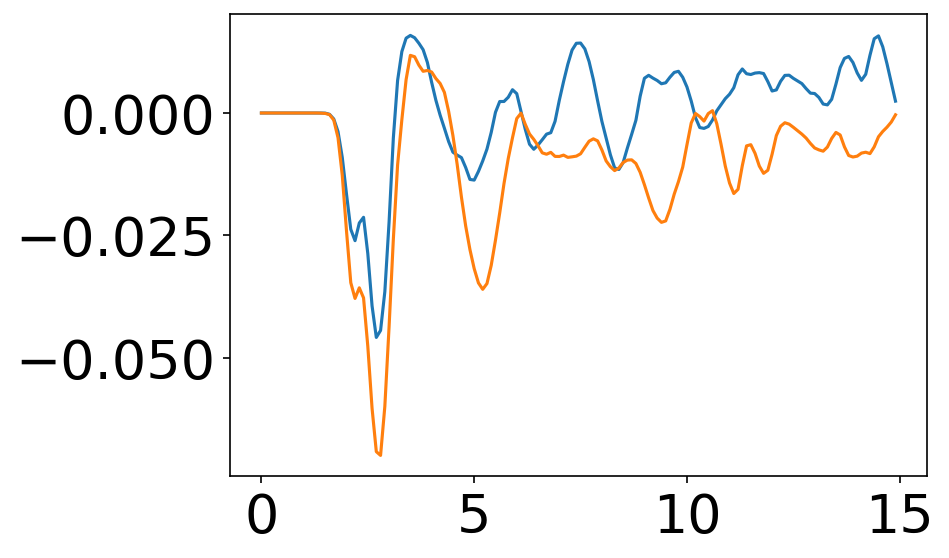

In [12]:
plt.plot(np.arange(0., 15., 0.1), task_serial.results.mM_lo)
plt.plot(np.arange(0., 15., 0.1), task_serial.results.mM_hi)
plt.show()

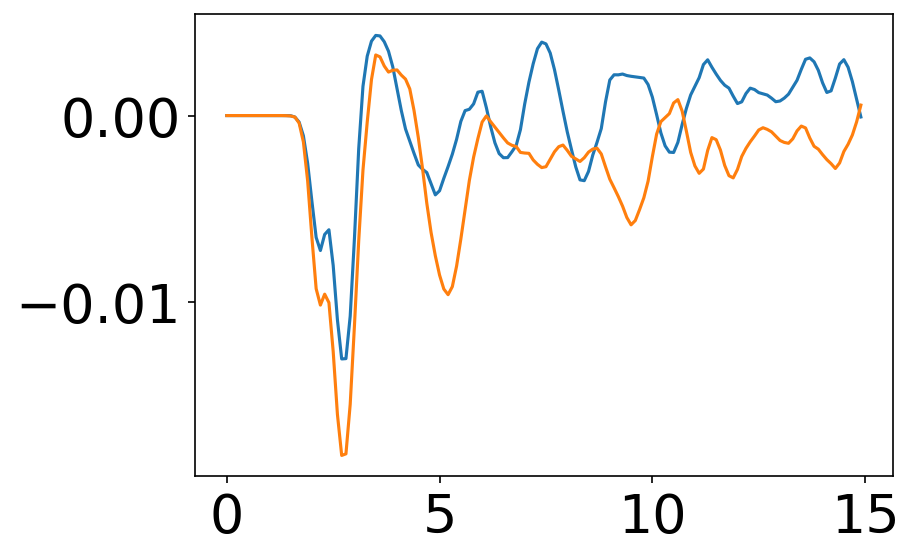

In [11]:
plt.plot(np.arange(0., 15., 0.1), task_serial.results.m_lo)
plt.plot(np.arange(0., 15., 0.1), task_serial.results.m_hi)
plt.show()

# My parallel code 

In [ ]:
from intdielec.watanalysis.dielectric import ParallelInverseDielectricConstant as PIDC

In [8]:
task_para = PIDC(atomgroups=ag, 
                 bin_edges=np.arange(0, 15.1, 0.1), 
                 temperature=330, 
                 img_plane=0.9, 
                 surf_ids=surf_ids)
task_para.run(0, 1000, 1, 20)

/opt/miniconda3/envs/leiden/lib/python3.9/multiprocessing/reduction.py:51: UserWarning: Reader has no dt information, set to 1.0 ps
  cls(buf, protocol).dump(obj)
/Users/jxzhu/workspace/software/mdanalysis/package/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


In [5]:
dname = "intdielec_out"
if not os.path.exists(dname):
    os.makedirs(dname)
np.save(os.path.join(dname, "inveps.npy"), task.results["inveps"])
np.save(os.path.join(dname, "M2.npy"), task.results["M2"])
np.save(os.path.join(dname, "m.npy"), task.results["m"])
np.save(os.path.join(dname, "mM.npy"), task.results["mM"])
np.save(os.path.join(dname, "M.npy"), task.results["M"])

# MAICoS

In [ ]:
import maicos

In [17]:
water = u.select_atoms('resname R1')
print(water)
# Create the analysis object with the appropriate parameters.
analysis_obj = maicos.DielectricPlanar(water, 
                                       bin_width=0.2, 
                                       refgroup=water, 
                                       is_3d=True, 
                                       unwrap=False, 
                                       temperature=330, 
                                       sym=True)
analysis_obj.run(start=0, stop=1000, step=1)

/Users/jxzhu/workspace/software/maicos/src/maicos/core/base.py:228: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/Users/jxzhu/workspace/software/mdanalysis/package/MDAnalysis/core/groups.py:440: DeprecationWarning: The 'pbc' kwarg has been deprecated and will be removed in version 3.0., please use 'wrap' instead
  warnings.warn("The 'pbc' kwarg has been deprecated and will be "
Preparing error estimation.


<AtomGroup [<Atom 1: O of type O of resname R1, resid 1 and segid MOL1>, <Atom 2: H of type H of resname R1, resid 1 and segid MOL1>, <Atom 3: H of type H of resname R1, resid 1 and segid MOL1>, ..., <Atom 289: O of type O of resname R1, resid 97 and segid MOL1>, <Atom 290: H of type H of resname R1, resid 97 and segid MOL1>, <Atom 291: H of type H of resname R1, resid 97 and segid MOL1>]>


/Users/jxzhu/workspace/software/maicos/src/maicos/core/base.py:291: UserWarning: Your trajectory does not provide sufficient statistics to estimate a correlation time. Use the calculated error estimates with caution.
  self.corrtime = correlation_analysis(timeseries)


In [18]:
analysis_obj.save()

In [11]:
_y = analysis_obj.results.eps_perp.flatten()
y = (_y[:len(_y)//2] - np.flip(_y)[:len(_y)//2]) / 2

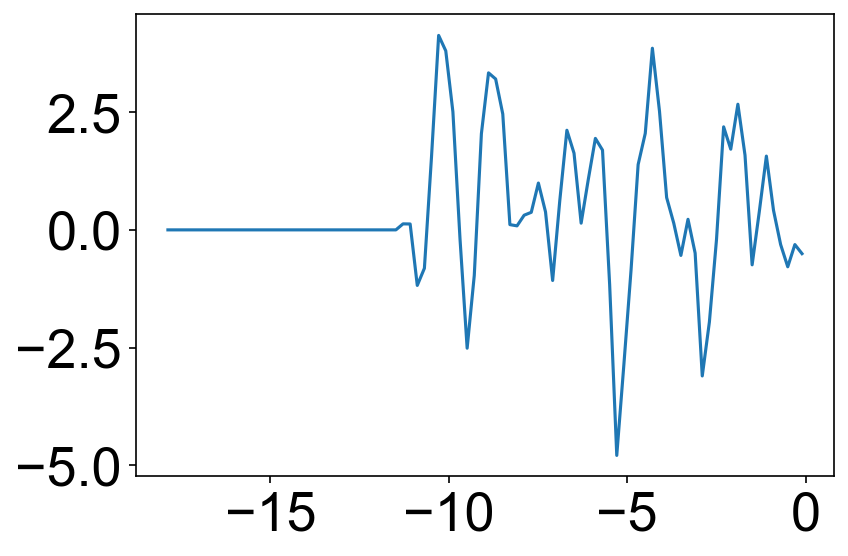

In [12]:
z = analysis_obj.results.bin_pos
plt.plot(z[:len(_y)//2], y)

plt.show()

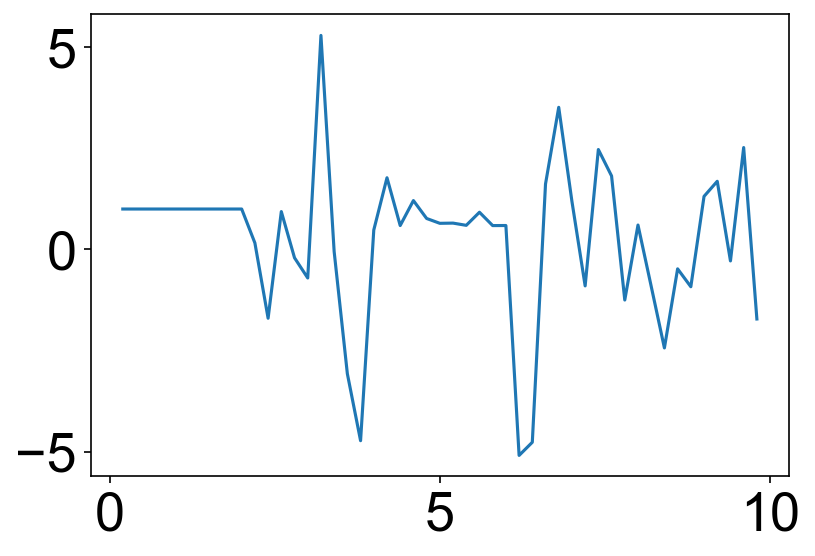

In [16]:
x = np.arange(0., 10., 0.2)
y = np.load("intdielec_out/inveps.npy")
plt.plot(x[1:], y)

plt.show()

/var/folders/w9/tf8znvhn5cj1fxnb4gkhy9zm0000gn/T/ipykernel_50184/1548683730.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


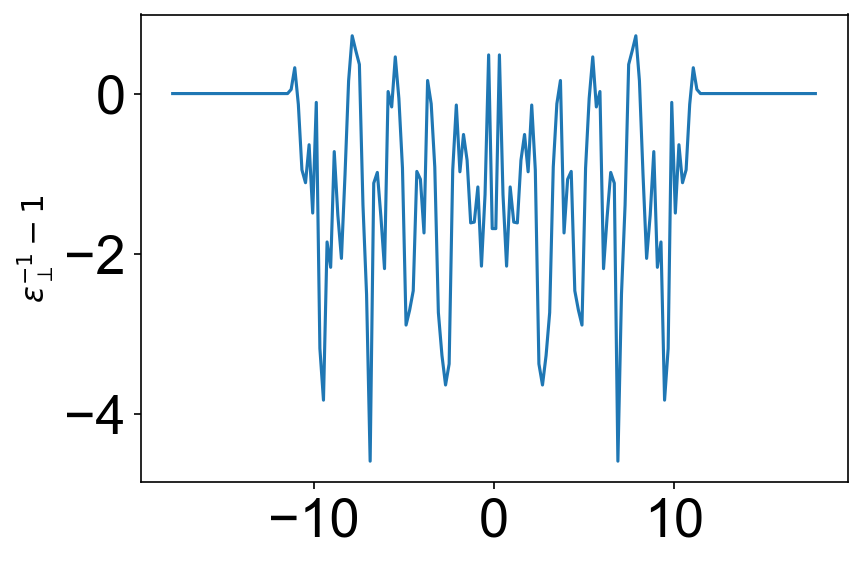

In [19]:
fig, ax = plt.subplots()

z = analysis_obj.results.bin_pos

ax.plot(z, analysis_obj.results.eps_perp)
ax.set_ylabel(r'$\varepsilon^{-1}_{\perp} - 1$')

# # Only plot the actual physical system:
# ax[0].set_xlim([-7, 7])
# ax[1].set_xlim([-7, 7])

# # Also plot the bulk values for reference
# ax[0].axhline(1 / 71 - 1, color='black', linestyle='dashed')
# ax[1].axhline(71 - 1, color='black', linestyle='dashed')

fig.tight_layout()
fig.show()

In [ ]:
# topo = "input_data/interface.psf"

fnames = glob.glob("**/dump.lammpstrj", recursive=True)
fnames.sort()

for fname in fnames:
    u = mda.Universe(topo, 
                     fname, 
                     topology_format="PSF",
                     format="LAMMPSDUMP")
    water = u.select_atoms('resname R1')
    # print(water)
    # Create the analysis object with the appropriate parameters.
    analysis_obj = maicos.DielectricPlanar(water, 
                                           bin_width=0.1, 
                                           refgroup=water, 
                                           is_3d=True, 
                                           unwrap=False, 
                                           temperature=330)
    analysis_obj.run(start=0, stop=1000, step=1)